In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


**READING THE DATASET**

In [2]:
data=pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**CHECKING FOR NULL VALUES**

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

**CHECKING WHETHER THE DATASET IS IMBALANCED OR NOT**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

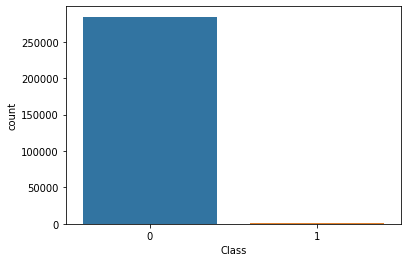

In [8]:
sns.countplot(data.Class)

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**CHECKING FOR OUTLIERS**

<AxesSubplot:>

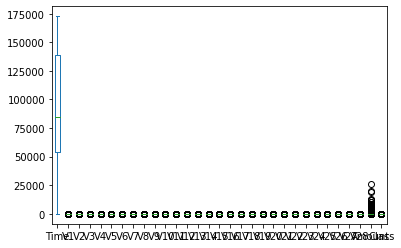

In [10]:
data.plot(kind='box')

In [11]:
x=data.drop('Class',axis=1)
y=data['Class']

In [12]:
import imblearn

**AS THE DATASET IS IMBALANCED WE ARE USING UNDERSAMPLING TECHNIQUE IN THE DATASET TO EQUAL THE VALUES**

In [13]:
undersample_data=imblearn.under_sampling.NearMiss(version=1)
X,Y=undersample_data.fit_resample(x,y)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

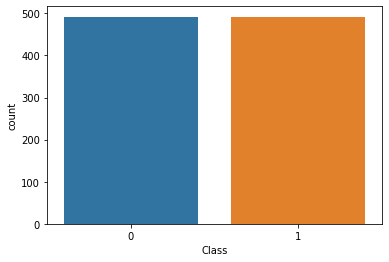

In [14]:
sns.countplot(Y)

**AFTER APPLYING THE UNDERSAMPLING TECHNIQUES WE CAN THE DATASET HAVE BEEN BALANCED**

In [15]:
Y.value_counts()

0    492
1    492
Name: Class, dtype: int64

**MODEL BUILDING**

NOW WE CAN APPLY THE 4 MACHINE LEARNING ALGORITHMS TO THE DATASET SO WE CAN CHOOSE WHICH ALGORITHM IS BETTER FROM THE ACCURACY SCORE.

THE ALGORITHMS ARE :

1. NAIVE BAYES
2. LOGISTIC REGRESSION
3. RANDOMFOREST CLASSIFIER
4. DECISIONTREE CLASSIFIER


**1. NAIVE BAYES**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [17]:
pred=gnb.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [19]:
print(accuracy_score(Y_test,pred))

0.8658536585365854


In [20]:
matrix=confusion_matrix(Y_test,pred)

In [21]:
from sklearn import metrics
matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=[False,True])

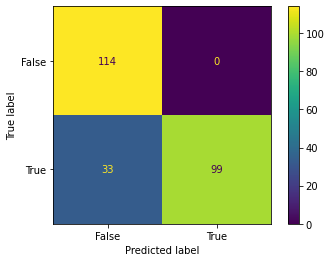

In [22]:
matrix_display.plot()

In [23]:
def display_score(y_test,pred):
    accuracy=metrics.accuracy_score(Y_test,pred)
    precision=metrics.average_precision_score(Y_test,pred)
    recall=metrics.recall_score(Y_test,pred)
    f1_score=metrics.f1_score(Y_test,pred)
    print({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1_score})

In [24]:
display_score(Y_test,pred)

{'Accuracy': 0.8658536585365854, 'Precision': 0.8841463414634146, 'Recall': 0.75, 'F1_score': 0.8571428571428571}


**2. DECISION TREE CLASSIFIER**

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

In [27]:
print(accuracy_score(Y_test,dt_pred))

0.967479674796748


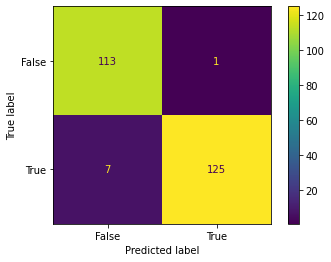

In [28]:
dt_matrix=confusion_matrix(Y_test,dt_pred)
matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=dt_matrix,display_labels=[False,True])
matrix_display.plot()

In [29]:
def display_score(y_test,pred):
    accuracy=metrics.accuracy_score(Y_test,pred)
    precision=metrics.average_precision_score(Y_test,pred)
    recall=metrics.recall_score(Y_test,pred)
    f1_score=metrics.f1_score(Y_test,pred)
    print({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1_score})

In [35]:
display_score(Y_test,dt_pred)

{'Accuracy': 0.967479674796748, 'Precision': 0.9679093490069101, 'Recall': 0.946969696969697, 'F1_score': 0.9689922480620156}


**3. RANDOM FOREST CLASSIFIER**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(X_train,Y_train)
rand_pred=rand.predict(X_test)

In [33]:
print(accuracy_score(Y_test,rand_pred))

0.9512195121951219


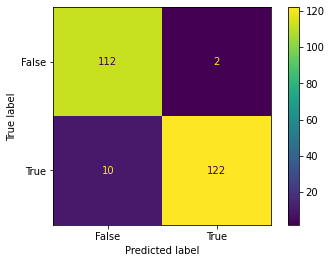

In [34]:
dt_matrix=confusion_matrix(Y_test,rand_pred)
matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=dt_matrix,display_labels=[False,True])
matrix_display.plot()

In [36]:
def display_score(y_test,pred):
    accuracy=metrics.accuracy_score(Y_test,pred)
    precision=metrics.average_precision_score(Y_test,pred)
    recall=metrics.recall_score(Y_test,pred)
    f1_score=metrics.f1_score(Y_test,pred)
    print({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1_score})

In [37]:
display_score(Y_test,rand_pred)

{'Accuracy': 0.9512195121951219, 'Precision': 0.9499856948716114, 'Recall': 0.9242424242424242, 'F1_score': 0.9531249999999999}


In [46]:
import sklearn.metrics as metrics

In [49]:
fpr,tpr,threshold=metrics.roc_curve(Y_test,pred)

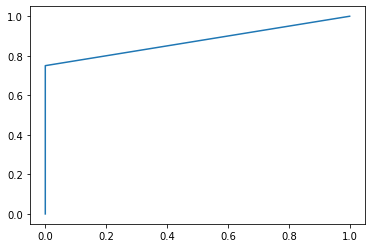

In [50]:
plt.plot(fpr,tpr)

In [51]:
rand_prob = rand.predict_proba(X_test)

**REASON TO PREDICT THE PROBAILITY OF THE DATASET**

**What does this mean?**

When a model is trained it learns the relationships between the input variables and the output variable. For each observation the model is shown, the model learns how probable it is that a given observation belongs to a certain class. When the model is presented with the test data it will guess for each unseen observation how probable it is to belong to a given class.

**How does the model know if an observation belongs to a class? **

During testing the model receives an observation for which it estimates a probability of 51% of belonging to Class X. How does take the decision to label as belonging to Class X or not? The researcher will set a threshold telling the model that all observations with a probability under 50% must be classified as Y and all those above must be classified as X. Sometimes the researcher wants to set a stricter rule because they're more interested in correctly predicting a given class like X rather than trying to predict all of them as well.

So you trained model has estimated a probability for each of your observations, but the threshold will ultimately decide to in which class your observation will be categorized.

**Why does this matter?**

The curve created by the ROC plots a point for each of the True positive rate and false positive rate of your model at different threshold levels. This helps the researcher to see the trade-off between the FPR and TPR for all threshold levels.

So when you pass the predicted values instead of the predicted probabilities to your ROC you will only have one point because these values were calculated using one specific threshold. Because that point is the TPR and FPR of your model for one specific threshold level.

What you need to do is use the probabilities instead and let the threshold vary.

Text(0.5, 1.0, 'ROC Curves - Random Forest')

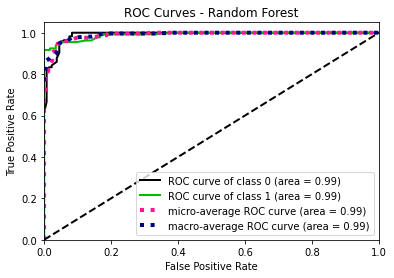

In [53]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(Y_test, rand_prob)
plt.title("ROC Curves - Random Forest")

Text(0.5, 1.0, 'ROC Curves - Desicion Tree')

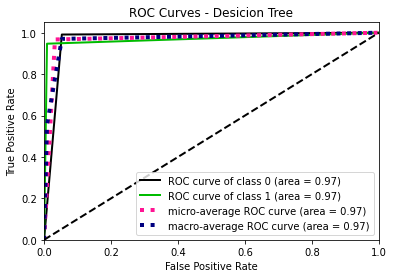

In [54]:
dt_prob=dt.predict_proba(X_test)
dt_plot = skplt.metrics.plot_roc(Y_test, dt_prob)
plt.title("ROC Curves - Desicion Tree")

**4. LOGISTIC REGRESSION**

In [58]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)
lg_pred=lg.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


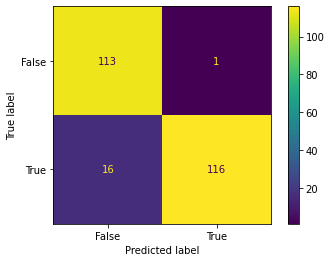

In [59]:
lg_matrix=confusion_matrix(Y_test,lg_pred)
matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=lg_matrix,display_labels=[False,True])
matrix_display.plot()

In [60]:
def display_score(y_test,pred):
    accuracy=metrics.accuracy_score(Y_test,pred)
    precision=metrics.average_precision_score(Y_test,pred)
    recall=metrics.recall_score(Y_test,pred)
    f1_score=metrics.f1_score(Y_test,pred)
    print({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1_score})

In [61]:
display_score(Y_test,lg_pred)

{'Accuracy': 0.9308943089430894, 'Precision': 0.9363175216833753, 'Recall': 0.8787878787878788, 'F1_score': 0.931726907630522}


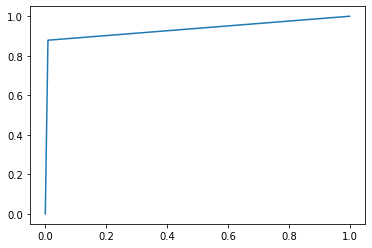

In [62]:
fpr,tpr,threshold=metrics.roc_curve(Y_test,lg_pred)
plt.plot(fpr,tpr)

Text(0.5, 1.0, 'ROC Curves - Logistic Regression')

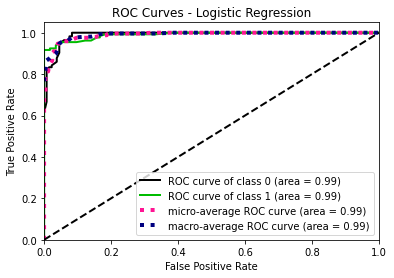

In [63]:
lg_prob = rand.predict_proba(X_test)
lg_plot = skplt.metrics.plot_roc(Y_test, lg_prob)
plt.title("ROC Curves - Logistic Regression")

**CONCLUSION**

SO AFTER APPLYING THE 4 CLASSIFICATION ALGORITHMS TO THE DATASET THE **RANDOM FOREST CLASSIFIER AND LOGISTIC REGRESSION** ALGORITHMS PERFORMED WELL WITH THE **ACCURACY SCORE OF 93% AND 95%**.

THE RANDOMFOREST ACCURACY SCORE IS GOOD COMPARING TO THE LOGISTIC REGRESSION SO WE CAN CHOOSE THE **RANDOM FOREST CLASSIFIER**.